# Urban Green Areas in Manchester

In [48]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx # map backgrounds

### Greater Manchester Boundaries

In [2]:
# Map Greater Manchester boundaries
# Boundary shape files from https://osdatahub.os.uk/downloads/open/BoundaryLine
# Simplified with https://mapshaper.org/
fp = 'data/boundary_lines/district_borough_unitary_region.shp'
df = gpd.read_file(fp)

In [3]:
greater_manchester_districts = [
    'Manchester District (B)',
    'Bury District (B)',
    'Oldham District (B)',
    'Rochdale District (B)',
    'Salford District (B)',
    'Trafford District (B)',
    'Stockport District (B)',
    'Tameside District (B)',
    'Bolton District (B)',
    'Wigan District (B)',
]

In [4]:
# Filtering to Greater Manchester
mcr_boroughs = df[df['NAME'].isin(greater_manchester_districts)]

In [6]:
mcr_boroughs.to_crs(epsg=3857, inplace=True)

/home/neperiana/.local/share/virtualenvs/mapping_urban_green_areas-t-ZFWFtm/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

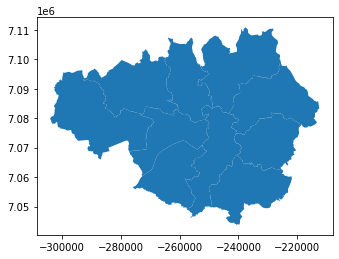

In [8]:
mcr_boroughs.plot()

In [29]:
# Define Greater Manchester
from shapely.ops import cascaded_union

greater_manchester = gpd.GeoSeries(cascaded_union(mcr_boroughs.geometry))
greater_manchester.set_crs(epsg=3857, inplace=True)

0    POLYGON ((-225561.883 7062907.534, -225555.677...
dtype: geometry

### Green spaces in Greater Manchester

In [10]:
fp = 'data/greenspace_SD/SD_GreenspaceSite.shp'
gs_sd = gpd.read_file(fp)

fp = 'data/greenspace_SJ/SJ_GreenspaceSite.shp'
gs_sj = gpd.read_file(fp)

gs = gpd.GeoDataFrame(
    pd.concat([gs_sd, gs_sj], ignore_index=True)
)

In [11]:
# Green spaces areas bu function
gs.function.value_counts()

Play Space                                4344
Playing Field                             2763
Religious Grounds                         2650
Other Sports Facility                     2126
Public Park Or Garden                     1725
Bowling Green                             1438
Allotments Or Community Growing Spaces    1395
Cemetery                                   680
Tennis Court                               659
Golf Course                                394
Name: function, dtype: int64

In [15]:
# Keeping parcs
function_types = ['Public Park Or Garden']
gs = gs[gs['function'].isin(function_types)]
gs.to_crs(epsg=3857, inplace=True)

In [16]:
# Filtering down to green spaces in greater manchester
mcr_gs = gpd.overlay(mcr_boroughs, gs, how='intersection')

<AxesSubplot:>

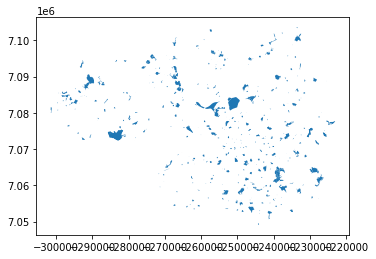

In [17]:
mcr_gs.plot()

Let's plot it using a nice background map.

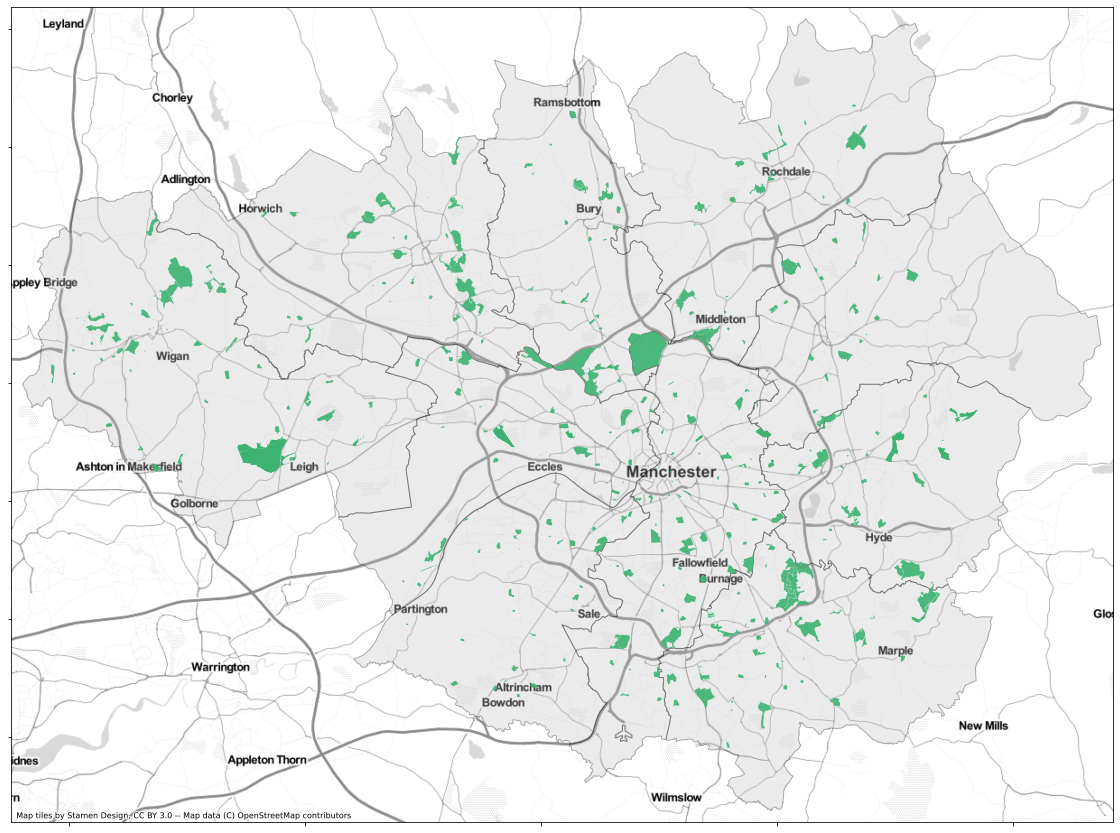

In [68]:
fig, ax = plt.subplots(figsize=(20,15))

# Define bounding box
bounds = greater_manchester.bounds
bounding_box = [
    bounds['minx'][0],
    bounds['maxx'][0],
    bounds['miny'][0],
    bounds['maxy'][0],
]

# Set bounds
ax.set_xlim(bounding_box[0]-1000, bounding_box[1] + 1000)
ax.set_ylim(bounding_box[2]-1000, bounding_box[3] + 1000)

# Plot borough borders
mcr_boroughs.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="silver")

# Plot green areas
mcr_gs.plot(ax=ax, alpha = 0.9, color="mediumseagreen")

# Add background
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

# Remove axis 
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

Let's zoom in to Manchester city.

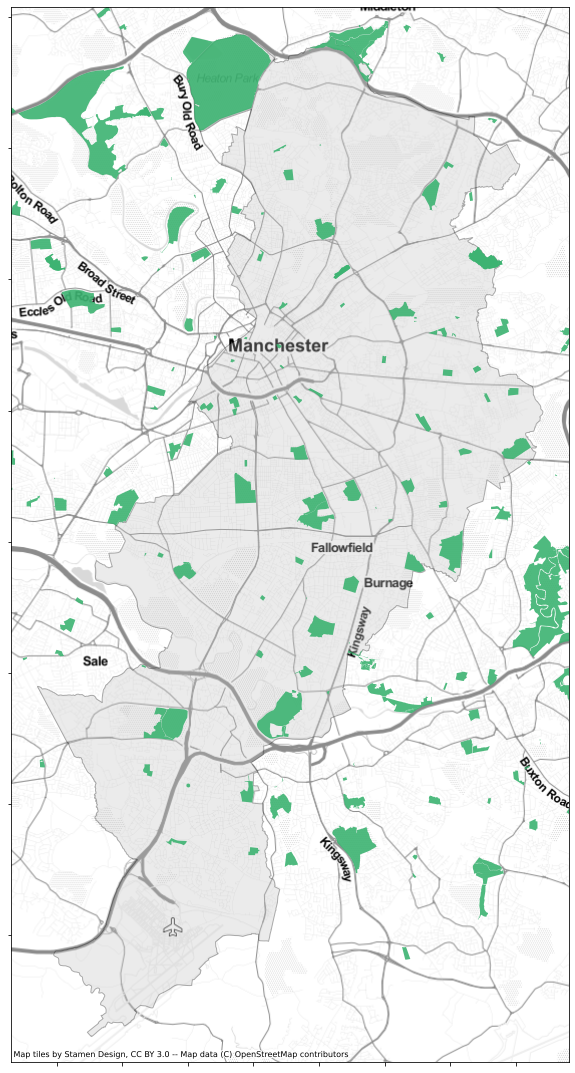

In [94]:
fig, ax = plt.subplots(figsize=(10,20))

# Define bounding box
mcr_city = mcr_boroughs[mcr_boroughs['NAME'] == 'Manchester District (B)']
bounds = mcr_city.bounds
bounding_box = [
    bounds['minx'].iloc[0],
    bounds['maxx'].iloc[0],
    bounds['miny'].iloc[0],
    bounds['maxy'].iloc[0],
]

# Set bounds
ax.set_xlim(bounding_box[0]-1000, bounding_box[1] + 1000)
ax.set_ylim(bounding_box[2]-1000, bounding_box[3] + 1000)

# Plot borough borders
mcr_city.plot(ax=ax, alpha=0.3, edgecolor="black", facecolor="silver")

# Plot green areas
mcr_gs.plot(ax=ax, alpha = 0.9, color="mediumseagreen")

# Add background
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

# Remove axis 
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

### Urban green space available for each postcode area